# Gaussian Discriminant Analysis
#### A Generative approach towards Classification problem

### Loading Libraries

In [44]:
from utils  import *

from sklearn.metrics               import mean_absolute_error
from sklearn.datasets              import load_iris
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.model_selection       import train_test_split

import seaborn           as sns
import matplotlib.pyplot as plt


### Data Used

In [2]:
data = sns.load_dataset("iris")
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Plot of Data

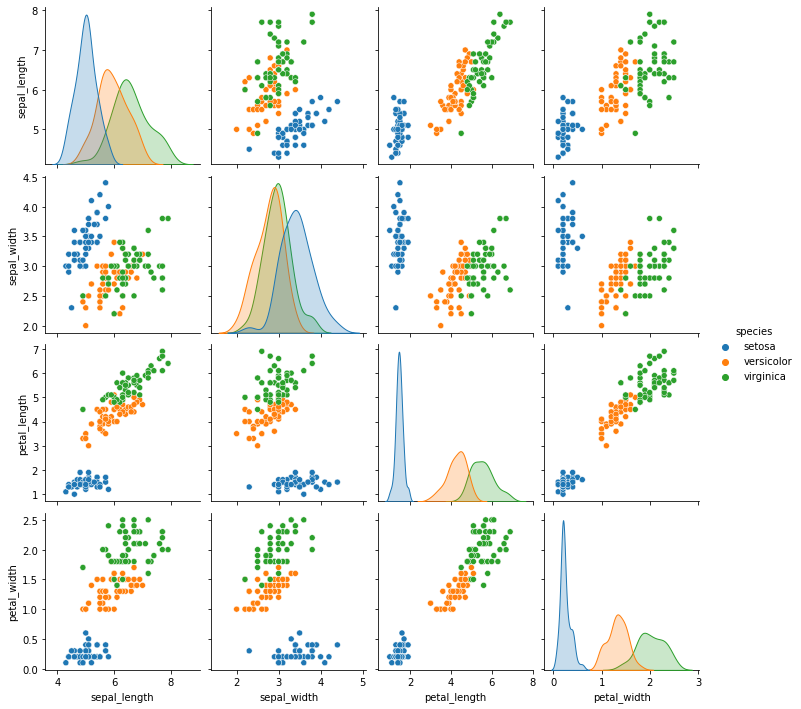

In [3]:
sns.pairplot(data=data, hue="species")

### Loading the Data

In [32]:
X, Y = load_iris(return_X_y=True)

m  = 100
TT_ratio = 0.2

X = X.T[[2, 3]].T

x1, x2 = X[:, 0], X[:, 1]

x, xv, y, yv = train_test_split(X, Y)
# x, xv, y, yv = train_test_split(X, Y, train_size=m, test_size=round(m*TT_ratio))


### Manual Generation

#### Actual Plot of Data

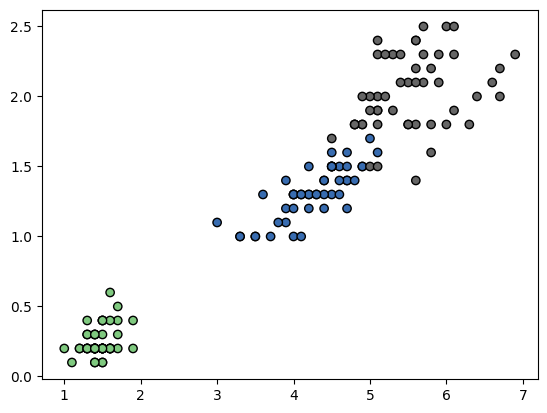

In [5]:
plt.scatter(x1, x2, c=Y, cmap=plt.cm.Accent, edgecolors='k')

#### Approximating Gaussians manually

##### Generation

In [6]:
# controls the centre of gaussian
mu = array(
     [[1.5 ,  .25],
      [4.00, 1.25],
      [5.25, 2.00]])

# controls skewness and spread
sigma = array(
        [[[1. , 0.],
          [0. , 1.]],
         [[1. , .8],
          [.8, 1.]],
         [[1., .5],
          [.5, 1.]]])
# Identity matrix -> round gaussian
# Increase main diagonal -> Skew Left
# Increase alternate diagonal -> Skew right

sigma[0]*=.05 # controls spread in all directions
sigma[1]*=.1
sigma[2]*=.1

m = 150
n = 2
K = 3

# controls probabilities of occurences of each group
# (approximate)
phi  = 1./K * ones(K,)
phi2 = array([2/3, 1/6, 1/6])
phi3 = array([.10, .50, .40])

ys = random.multinomial(n=1, pvals=phi, size=(m,)).argmax(axis=1)
xs = zeros([m, n])

for k in range(K):
    nk = (ys==k).sum()
    xs[ys==k, :] = random.multivariate_normal(mu[k], sigma[k], size=(nk,))

# Uncomment to see counts of each class
# According to Phi

# print(ys[tuple([ys==0])].shape)
# print(ys[tuple([ys==1])].shape)
# print(ys[tuple([ys==2])].shape)


##### Plot

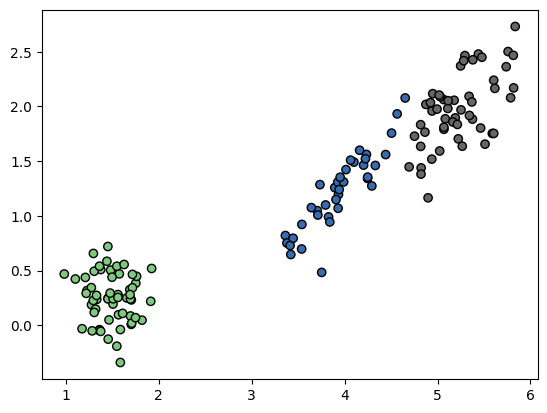

In [7]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys, cmap=plt.cm.Accent, edgecolors='k')

### Sklearn Generation

#### Code

In [39]:
model = QuadraticDiscriminantAnalysis()
model.fit(x, y)

# print(model.rotations_) # Sigma
# print(model.means_) # Mu
# print(model.priors_) # Phi
# print(model.scalings_) # Cov Scalings?

model.score(X, Y)

0.98

#### Plot

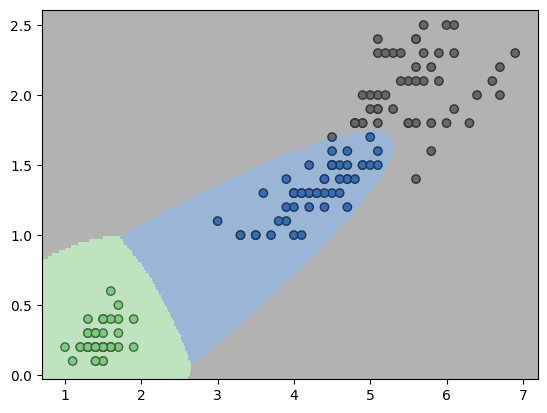

In [43]:
fig, ax = plt.subplots()
sp = ax.scatter(X[:, 0], X[:, 1], c=pred, edgecolors='k', cmap=plt.cm.Accent)

xlim = ax.axes.get_xlim()
ylim = ax.axes.get_ylim()

xx, yy = meshgrid(arange(xlim[0], xlim[1], 0.02), arange(ylim[0], ylim[1], 0.02))
Z = model.predict(c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.pcolormesh(xx, yy, Z, alpha=0.5, cmap=plt.cm.Accent)
sp.set_zorder = 2

### Manual Implementation (Pending)

---

### Further Reading

Special Cases of GDA aka Quadratic Discriminant Analysis (Non-Linear Decision Boundary)
- Linear Discriminant Analysis [[1]](https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/) [[2]](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) : Linear Decision Boundary, all $\Sigma$s are same
- Gaussian Naive Bayes [[1]](https://towardsdatascience.com/gaussian-naive-bayes-4d2895d139a?gi=99ab2676009e#:~:text=Naive%20Bayes%20is%20a%20generative,covariance%20matrices%20are%20diagonal%20matrices.) [[2]](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) [[3]](https://machinelearningmastery.com/naive-bayes-for-machine-learning/) : All $\Sigma$s are diagonal